# Needed packages

In [1]:
import cv2
import tensorflow as tf
import pickle
import matplotlib.pyplot as plt
import numpy as np
import math   
from mpl_toolkits.mplot3d import Axes3D

# Some functions

In [52]:
def sigmoid(z):
    return 1.0/(1.0+np.exp(-z))

def predict(filepath):
    IMG_SIZE = 100
    img_array = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
    new_array = cv2.resize(img_array, (IMG_SIZE,IMG_SIZE))
    prediction = model.predict([new_array.reshape(-1, IMG_SIZE,IMG_SIZE,1)])
    print('This is an image of a:' + ' ' + CATEGORIES[int(prediction[0][0])])
    plt.imshow(new_array, cmap='gray')

def prepare(filepath):
    IMG_SIZE = 100
    img_array = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
    new_array = cv2.resize(img_array, (IMG_SIZE,IMG_SIZE))
    return([new_array.reshape(-1, IMG_SIZE,IMG_SIZE,1)])

def plot_conv_weights(weights, input_channel=0):
    num_filters = weights.shape[3]
    num_grids = math.ceil(math.sqrt(num_filters))
    fig, axes = plt.subplots(num_grids, num_grids)
    for i, ax in enumerate(axes.flat):
        if i<num_filters:
            img = weights[:, :, input_channel, i]
            ax.imshow(img, interpolation='nearest', cmap='binary')
        ax.set_xticks([])
        ax.set_yticks([])
    plt.show()
    
def plot_conv_output(values):
    num_filters = values.shape[3]
    num_grids = math.ceil(math.sqrt(num_filters))
    fig, axes = plt.subplots(num_grids, num_grids)
    for i, ax in enumerate(axes.flat):
        if i<num_filters:
            img = values[0, :, :, i]
            ax.imshow(img, interpolation='nearest', cmap='binary')
        ax.set_xticks([])
        ax.set_yticks([])
    plt.show()
    
def plot_3d(dog_images, cat_images):
    Z = np.ones((np.shape(dog_images[0, :, :, 0])[0], np.shape(dog_images[0, :, :, 0])[0]))
    fig = plt.figure(figsize = (15,8))
    colors = ['k','b','r','c','g','y','violet','coral','m']
    axis = fig.add_subplot(1, 2, 1, projection="3d")
    for i in range(0,8):
        axis.scatter(dog_images[0, :, :, i], dog_images[0, :, :, i].T, i*Z, color = colors[i])
    axis.view_init(30, 20)
    axis.set_title('Input_1')
    axis = fig.add_subplot(1, 2, 2, projection="3d")
    for i in range(0,8):
        axis.scatter(cat_images[0, :, :, i], cat_images[0, :, :, i].T, i*Z, color = colors[i])
    axis.view_init(30, 20)
    axis.set_title('Input_2')
    plt.show()
    
def differences(input1, input2, weights):
    input1_preresult = np.multiply(input1[0], weights.T)
    input2_preresult = np.multiply(input2[0], weights.T)
    plt.figure(figsize = (16,8))
    plt.subplot(1, 2, 1)
    plt.scatter(input1[0], range(len(input1[0])), c = 'blue', alpha = 0.5, label = 'Input1')
    plt.scatter(input2[0], range(len(input2[0])), c = 'red', alpha = 0.5, label = 'Input2')
    plt.grid()
    plt.title('Unweighted')
    plt.legend(loc='lower right')
    plt.subplot(1, 2, 2)
    plt.scatter(input1_preresult[0], range(len(input1_preresult[0])), c = 'blue', alpha = 0.5, label = 'Input1')
    plt.scatter(input2_preresult[0], range(len(input2_preresult[0])), c = 'red', alpha = 0.5, label = 'Input2')
    plt.grid()
    plt.title('Weighted')
    plt.legend(loc='lower right')
    plt.show()
    
def result(input1, input2, weights):
    input1_result_unweighted = np.sum(input1[0])
    input2_result_unweighted = np.sum(input2[0])
    input1_sigmoid_unweighted = sigmoid(input1_result_unweighted)
    input2_sigmoid_unweighted = sigmoid(input2_result_unweighted)
    input1_result = np.dot(input1[0], weights) 
    input2_result = np.dot(input2[0], weights) 
    input1_sigmoid = sigmoid(input1_result)
    input2_sigmoid = sigmoid(input2_result)
    plt.figure(figsize = (15,5))
    plt.subplot(2, 2, 1)
    plt.scatter(input1_result_unweighted, range(len(input1_result)), c = 'blue', alpha = 0.6, label = 'Input1')
    plt.scatter(input2_result_unweighted, range(len(input2_result)), c = 'red', alpha = 0.6, label = 'Input2')
    plt.legend()
    plt.title('Unsigmoid')
    plt.ylabel('Unweighted')
    plt.subplot(2, 2, 2)
    plt.scatter(input1_sigmoid_unweighted, range(len(input1_sigmoid)), c = 'blue', alpha = 0.7)
    plt.scatter(input2_sigmoid_unweighted, range(len(input2_sigmoid)), c = 'red', alpha = 0.3)
    plt.axvline(0.5,0.0, linestyle = '--', c = 'green')
    plt.title('Sigmoid')
    plt.subplot(2, 2, 3)
    plt.scatter(input1_result, range(len(input1_result)), c = 'blue', alpha = 0.6)
    plt.scatter(input2_result, range(len(input2_result)), c = 'red', alpha = 0.6)
    plt.ylabel('Weighted')
    plt.subplot(2, 2, 4)
    plt.scatter(input1_sigmoid, range(len(input1_sigmoid)), c = 'blue', alpha = 0.6)
    plt.scatter(input2_sigmoid, range(len(input2_sigmoid)), c = 'red', alpha = 0.6)
    plt.axvline(0.5,0.0, linestyle = '--', c = 'green')
    plt.show()

# Import the simple model for classification of cats and dogs

In [40]:
CATEGORIES = ['Dog', 'Cat']
model = tf.keras.models.load_model('visualisation.model')
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 96, 96, 9)         234       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 48, 48, 9)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 44, 44, 36)        8136      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 22, 22, 36)        0         
_________________________________________________________________
global_average_pooling2d (Gl (None, 36)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 37        
Total params: 8,407
Trainable params: 8,407
Non-trainable params: 0
_________________________________________________________________


This is an image of a: Dog


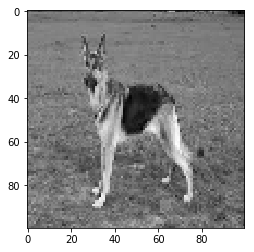

In [41]:
predict('dog2.jpg')

This is an image of a: Cat


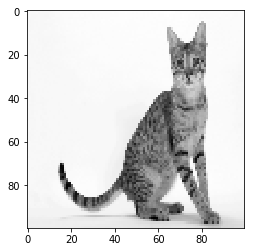

In [42]:
predict('cat2.jpg')

# Get information from the neural network

In [43]:
layer_conv1 = model.layers[0]
layer_conv2 = model.layers[2]
layer_pool1 = model.layers[1]
layer_pool2 = model.layers[3]
layer_maxpool = model.layers[4]
output = model.layers[5]

In [44]:
weights_conv1 = layer_conv1.get_weights()[0]
weights_conv2 = layer_conv2.get_weights()[0]
weights_output = output.get_weights()[0]

In [45]:
output_conv1 = tf.keras.Model(inputs=layer_conv1.input, outputs=layer_conv1.output)
output_conv2 = tf.keras.Model(inputs=layer_conv1.input, outputs=layer_conv2.output)
output_pool1 = tf.keras.Model(inputs=layer_conv1.input, outputs=layer_pool1.output)
output_pool2 = tf.keras.Model(inputs=layer_conv1.input, outputs=layer_pool2.output)
output_maxpool = tf.keras.Model(inputs=layer_conv1.input, outputs=layer_maxpool.output)

In [46]:
dog_layer_outputconv1 = output_conv1.predict(prepare('dog2.jpg'))
dog_layer_outputconv2 = output_conv2.predict(prepare('dog2.jpg'))
dog_layer_outputpool1 = output_pool1.predict(prepare('dog2.jpg'))
dog_layer_outputpool2 = output_pool2.predict(prepare('dog2.jpg'))
dog_layer_outputmaxpool = output_maxpool.predict(prepare('dog2.jpg'))

In [47]:
cat_layer_outputconv1 = output_conv1.predict(prepare('cat2.jpg'))
cat_layer_outputconv2 = output_conv2.predict(prepare('cat2.jpg'))
cat_layer_outputpool1 = output_pool1.predict(prepare('cat2.jpg'))
cat_layer_outputpool2 = output_pool2.predict(prepare('cat2.jpg'))
cat_layer_outputmaxpool = output_maxpool.predict(prepare('cat2.jpg'))

# Lets visualize how the convolution and pooling work to predict

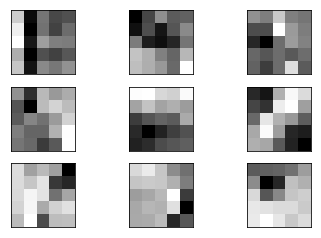

In [48]:
plot_conv_weights(weights=weights_conv1, input_channel=0)

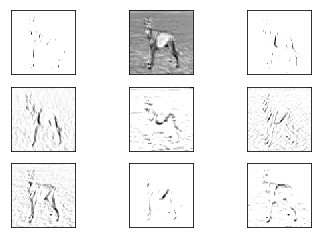

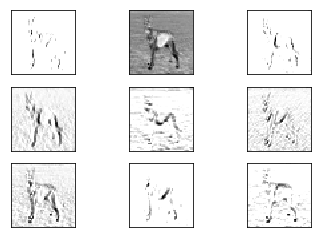

In [49]:
plot_conv_output(values=dog_layer_outputconv1)
plot_conv_output(values=dog_layer_outputpool1)

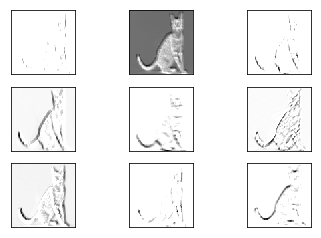

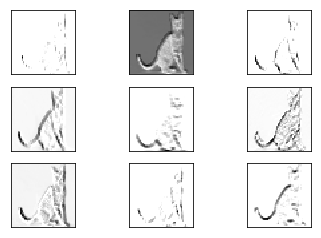

In [50]:
plot_conv_output(values=cat_layer_outputconv1)
plot_conv_output(values=cat_layer_outputpool1)

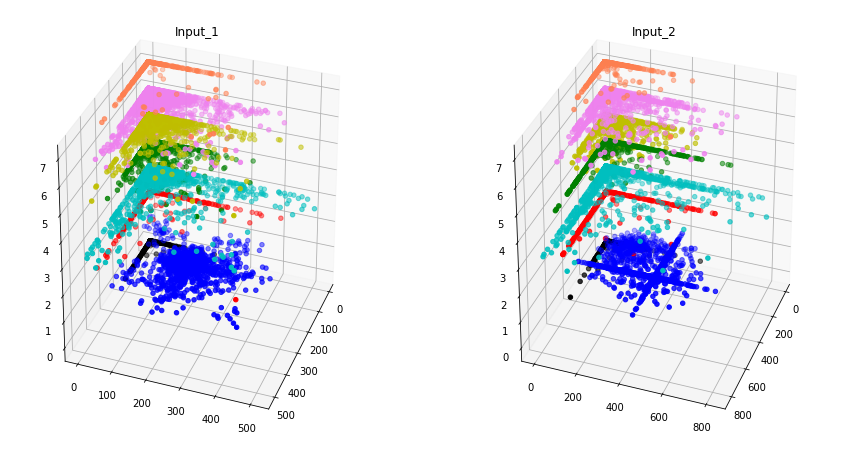

In [53]:
plot_3d(dog_layer_outputpool1, cat_layer_outputpool1)

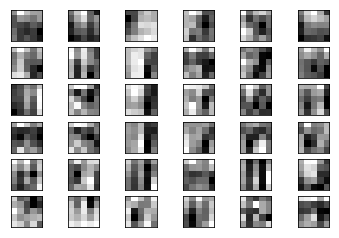

In [26]:
plot_conv_weights(weights=weights_conv2, input_channel=0)

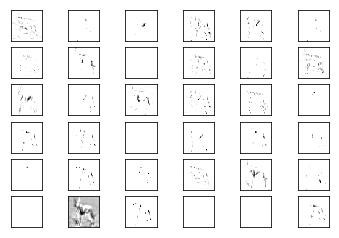

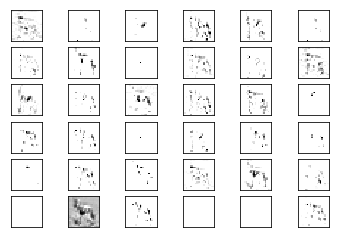

In [27]:
plot_conv_output(values=dog_layer_outputconv2)
plot_conv_output(values=dog_layer_outputpool2)

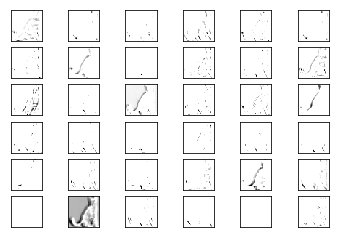

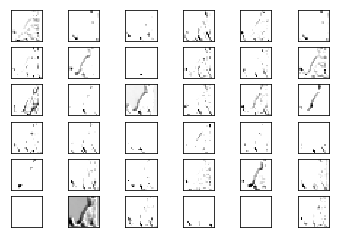

In [28]:
plot_conv_output(values=cat_layer_outputconv2)
plot_conv_output(values=cat_layer_outputpool2)

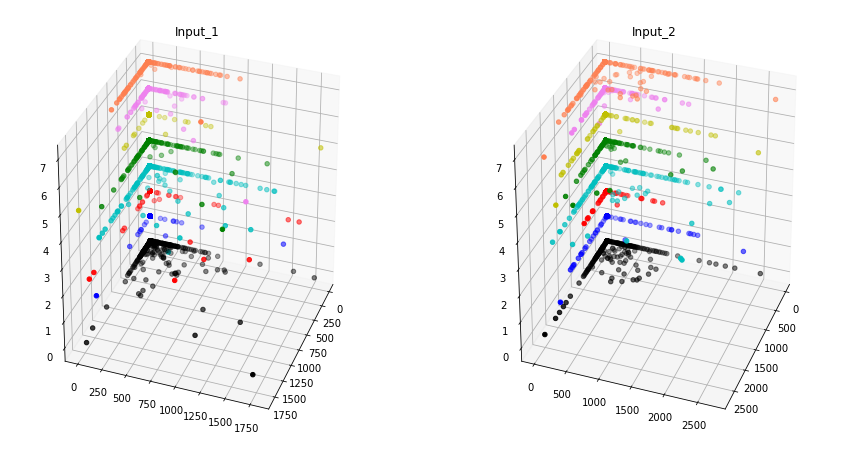

In [29]:
plot_3d(dog_layer_outputpool2, cat_layer_outputpool2)

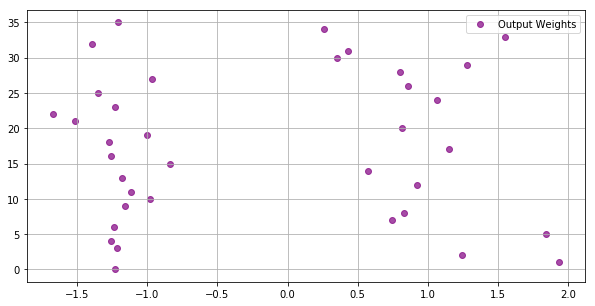

In [430]:
plt.figure(figsize = (10,5))
plt.scatter(weights_output, range(len(weights_output)), c = 'purple', alpha = 0.7, label = 'Output Weights')
plt.grid()
plt.legend()
plt.show()

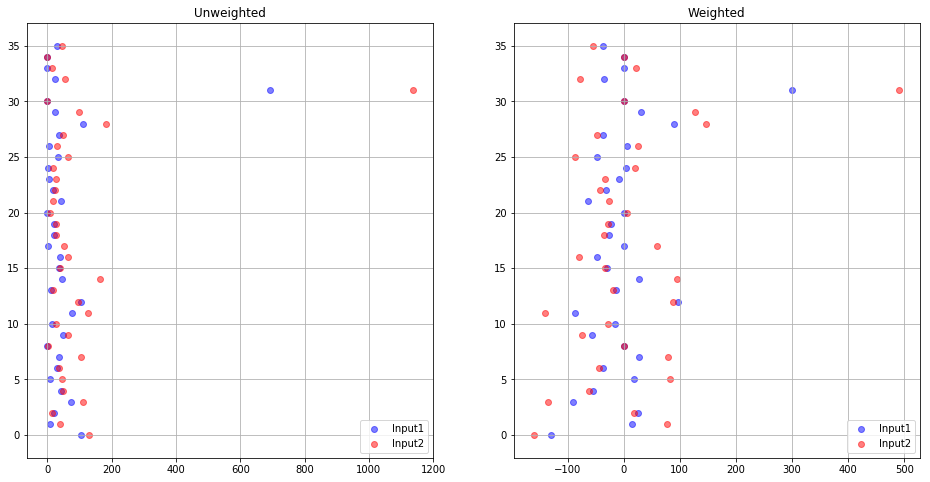

In [54]:
differences(dog_layer_outputmaxpool, cat_layer_outputmaxpool, weights_output)

/home/julian/anaconda3/envs/TensorFlow/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


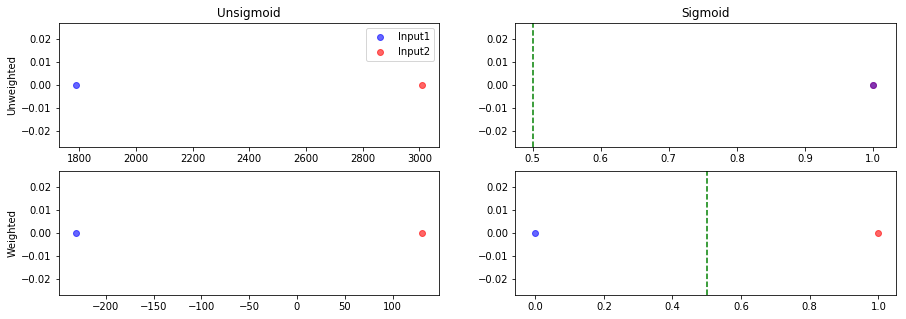

In [55]:
result(dog_layer_outputmaxpool, cat_layer_outputmaxpool, weights_output)

# Lets try a racoon image

In [475]:
racoon_layer_outputconv1 = output_conv1.predict(prepare('face.png'))
racoon_layer_outputconv2 = output_conv2.predict(prepare('face.png'))
racoon_layer_outputpool1 = output_pool1.predict(prepare('face.png'))
racoon_layer_outputpool2 = output_pool2.predict(prepare('face.png'))
racoon_layer_outputmaxpool = output_maxpool.predict(prepare('face.png'))

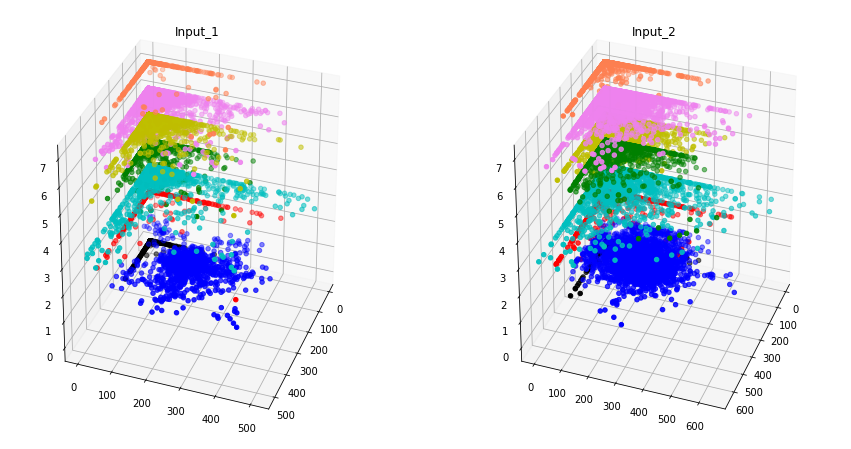

In [460]:
plot_3d(dog_layer_outputpool1, racoon_layer_outputpool1)

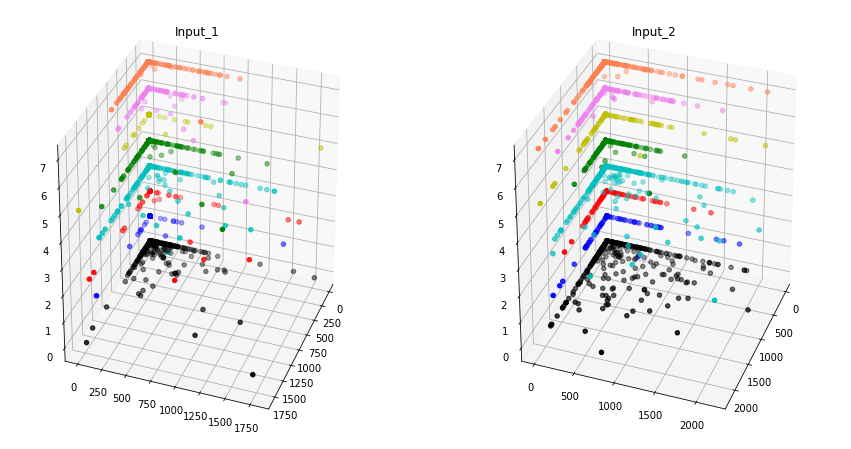

In [461]:
plot_3d(dog_layer_outputpool2, racoon_layer_outputpool2)

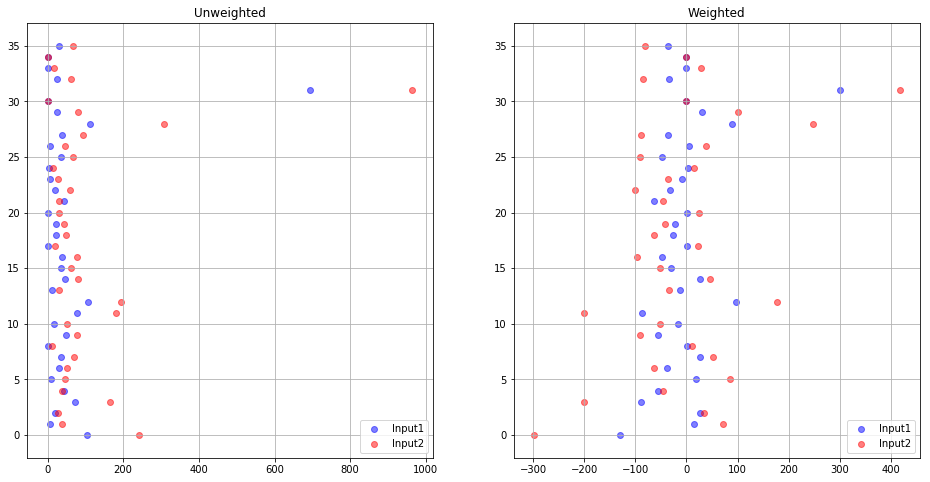

In [465]:
differences(dog_layer_outputmaxpool, racoon_layer_outputmaxpool, weights_output)

/home/julian/anaconda3/envs/TensorFlow/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


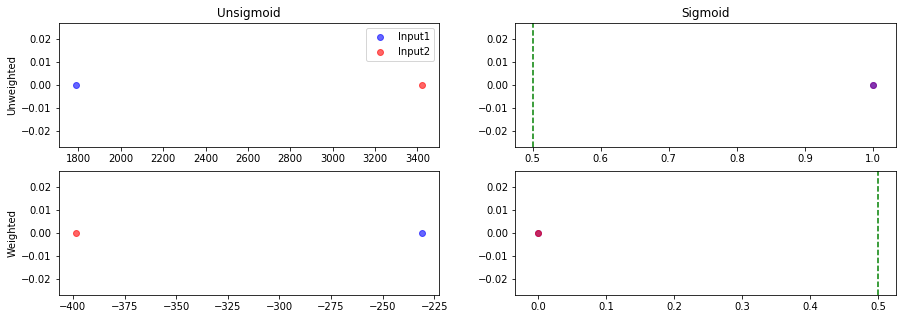

In [471]:
result(dog_layer_outputmaxpool, racoon_layer_outputmaxpool, weights_output)

This is an image of a: Dog


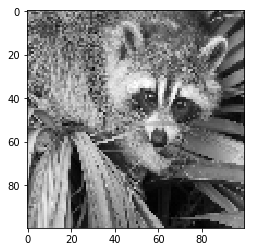

In [472]:
predict('face.png')

# What about a person

In [479]:
robin_layer_outputconv1 = output_conv1.predict(prepare('robin.jpg'))
robin_layer_outputconv2 = output_conv2.predict(prepare('robin.jpg'))
robin_layer_outputpool1 = output_pool1.predict(prepare('robin.jpg'))
robin_layer_outputpool2 = output_pool2.predict(prepare('robin.jpg'))
robin_layer_outputmaxpool = output_maxpool.predict(prepare('robin.jpg'))

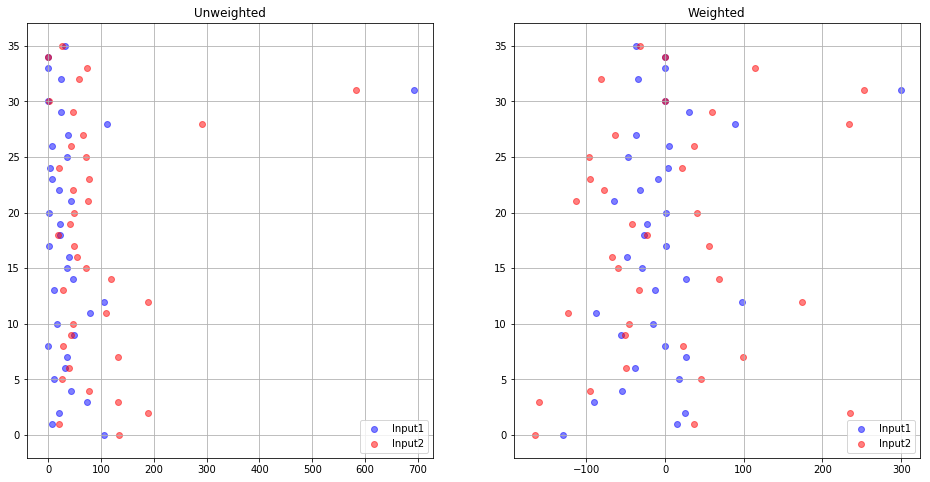

In [480]:
differences(dog_layer_outputmaxpool, robin_layer_outputmaxpool, weights_output)

/home/julian/anaconda3/envs/TensorFlow/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


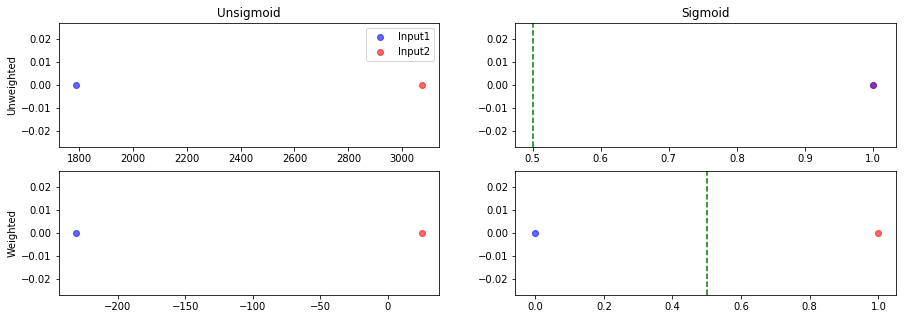

In [482]:
result(dog_layer_outputmaxpool, robin_layer_outputmaxpool, weights_output)

This is an image of a: Cat


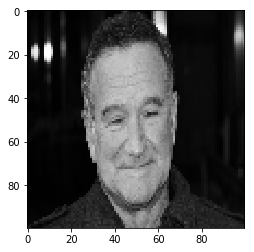

In [483]:
predict('robin.jpg')